In [1]:
%pylab inline
from classy import *

Populating the interactive namespace from numpy and matplotlib
Version:  0.0.15


## Make up some data

In [2]:
data=Struct()

x=randn(100)

data.targets=x>0
data.vectors=vstack([x,-.3*x+randn(100)*.2]).T
print(data.vectors.shape)
data.feature_names=['This','That']
data.target_names=['Bob','Sally']

(100, 2)


(-3.0, 3.0, -1.5, 1.0)

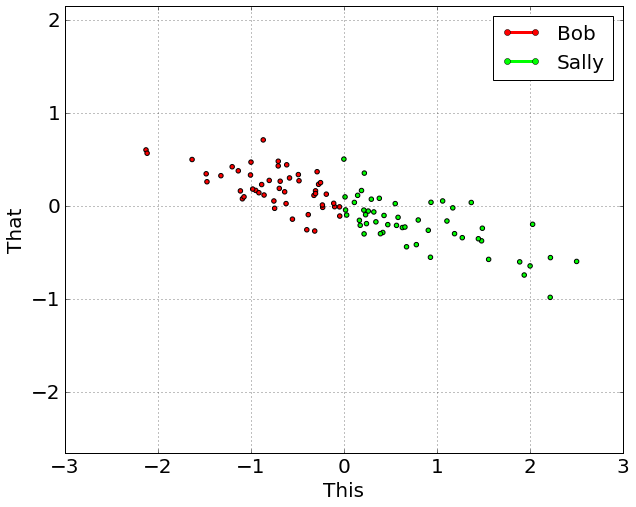

In [3]:
plot2D(data)
axis('equal')

In [4]:
data_train,data_test=split(data)

Original vector shape:  (100, 2)
Train vector shape:  (75, 2)
Test vector shape:  (25, 2)


## Do PCA

In [5]:
F=PCA(2)  # 2 is the max for this problem

In [6]:
new_vectors=F.fit_transform(data.vectors)

In [7]:
F.weights

array([[ 0.96466163, -0.26349183],
       [ 0.26349183,  0.96466163]])

(-3.0, 3.0, -1.5, 2.5)

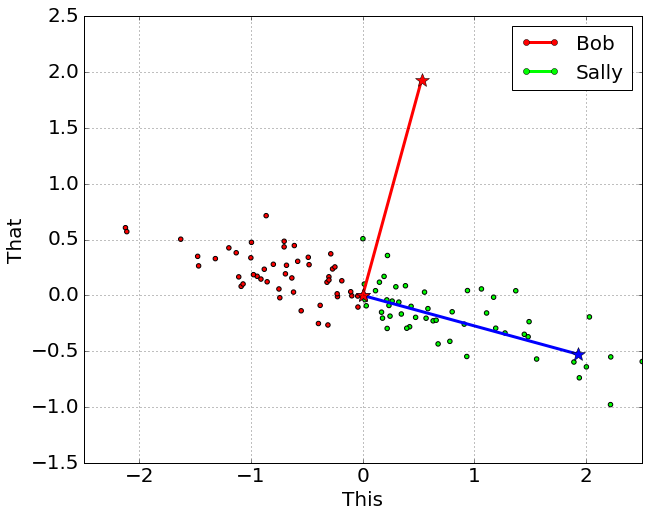

In [8]:
plot2D(data)

PC1=2*F.weights[0]
PC2=2*F.weights[1]

plot([0,PC1[0]],[0,PC1[1]],'b-*',markersize=15)
plot([0,PC2[0]],[0,PC2[1]],'r-*',markersize=15)
axis('equal')

## Dimensionality Reduction

In [9]:
F=PCA(1)  # 2 is the max for this problem

In [10]:
train_vectors_reduced=F.fit_transform(data_train.vectors)
test_vectors_reduced=F.transform(data_test.vectors)

### Plot the Result

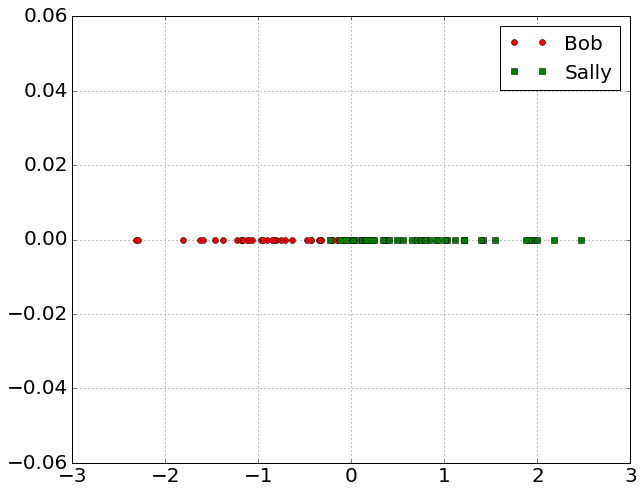

In [11]:
v=train_vectors_reduced[data_train.targets==0]
plot(v,zeros(v.shape),'ro',label='Bob')

v=train_vectors_reduced[data_train.targets==1]
plot(v,zeros(v.shape),'gs',label='Sally')
legend()